> ### EEE3314-02: Introduction to Artificial Intelligence

# Assignment \# III: Logistic Regression

<div style="text-align: right"> **Due date: Nov. 2, 2019.** </div> 
<div style="text-align: right"> **Please upload your file @ yscec by 8PM in the form of [ID_Name.zip].** </div> 
<div style="text-align: right"> Wonkyung Lee (이원경): <a href="mailto:leewk92@yonsei.ac.kr">leewk92@yonsei.ac.kr</a> </div>
<div style="text-align: right"> Geon Lee (이건): <a href="mailto:2015142195@yonsei.ac.kr"> 2015142195@yonsei.ac.kr</a> </div>

### *Assignement Instructions:*
- Write a program implementing a particular algorithm to solve a given problem.   
- <h4><span style="color:red">**Report and discuss your results. Analyze the algorithm, theoretically and empirically. **</span> </h4>

### *Collaboration policy:*
- You may discuss the questions.   
- Each student writes their own answers.   
- **Write on your homework anyone with whom you collaborate.**   
- Each student must write their own code for the programming part (**if not you will get a F grade**).

<h2><span style="color:blue">2019843554 Kai Jun Neo</span> </h2>

In [33]:
%load_ext autoreload
%autoreload 2

import datetime
print("This code is written at " + str(datetime.datetime.now()))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
This code is written at 2019-11-02 02:28:59.462043


## Problem description

We will implement $Stochastic Gradient Descent (SGD)$ to optimize a logistic regression model to predict whether a given patient have diabetes or not. In clinical informatics, machine learning approahces have been widely adopted to predict clinically adverse events based on patient data. For this problem, we will use the Pima Indians Diabetes Data Set. The data on each patient include:

- $\texttt{label}$: The output class variable (0 - normal or 1 - diabetes)  
- $\texttt{num_preg}$: Number of times pregnant 
- $\texttt{PGC}$: Plasma glucose concentration at 2 hours in an oral glucose tolerance test (PGC)
- $\texttt{DBP}$: Diastolic blood pressure (DBP)
- $\texttt{tricept}$: Triceps skin fold thickness (tricept, unit: mm)  
- $\texttt{insulin}$: 2-Hour serum insulin (insulin, unit: μU/ml)
- $\texttt{BMI}$: Body mass index (BMI)
- $\texttt{ped_func}$: Diabetes pedigree function
- $\texttt{age}$: Age (age, years)

Among all 768 patients, we will separate 500 patients as training data ($\texttt{logistic_regression_training_data.csv}$) and 268 patients as test data ($\texttt{logistic_regression_test_data.csv}$).

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
from P03 import load_data

In [36]:
train_csv_path = 'logistic_regression_training_data.csv'
test_csv_path = 'logistic_regression_testing_data.csv'
df_train = pd.read_csv(train_csv_path)
df_test = pd.read_csv(test_csv_path)

In [37]:
df_train.head()

,label,num_preg,PGC,DBP,tricept,insulin,BMI,ped_func,age
0,1,0.470588,0.758794,0.639344,0.507937,0.35,0.639344,0.187020,0.250000
1,1,0.235294,0.663317,0.000000,0.000000,0.00,0.490313,0.095645,0.033333
2,0,0.058824,0.467337,0.459016,0.174603,0.00,0.335320,0.144748,0.016667
3,0,0.058824,0.547739,0.311475,0.285714,0.20,0.344262,0.140478,0.083333
4,1,0.176471,0.869347,0.688525,0.523810,0.79,0.532042,0.076857,0.016667


In [38]:
X_train, y_train, features = load_data(df_train)
X_test, y_test, _ = load_data(df_test)

X = {'train': X_train, 'test': X_test}
y = {'train': y_train, 'test': y_test}

In [39]:
features

array(['num_preg', 'PGC', 'DBP', 'tricept', 'insulin', 'BMI', 'ped_func',
       'age'], dtype=object)

### I. Logistic regression method using SGD




### P1.1   
(*40 points*) P1.1 Implement a logistic regression method using SGD. You may assume that the data is randomly ordered. 

In [40]:
from P03 import LogisticRegressionSGD

In [41]:
iterations = 100000
lr = 0.8
number_of_ensemble = 1000

In [42]:
logistic_regression = LogisticRegressionSGD(lr, iterations, number_of_ensemble)
w = logistic_regression.fit(X, y)

In [43]:
print(w)

[  4.4679436   12.69103667  -0.62028873  -0.56351199  -1.36785783
   6.95546721   2.732417     0.87419461 -12.09976783]


### P1.2

(*10 points*) P1.2 Plot $\bar L$ every 100 iterations, e.g., [100, 200, 300,...], defined as

$\begin{equation} \bar L(T) = \frac{1}{T}\sum_{t=1}^{T} (\hat y^t - y^t)^2 \end{equation}$,   
where $T$ is the number of iterations and $\hat y^t$ (either 0 or 1) is the predicted label for sample $\bf{x}^t$ using the weights $\bf{w}^{t-1}$. 

> Initialize the weight vector $w$ and the bias $w_0$ to 0.    
> Learning rate = 0.8.    
> Number of iterations = 100,000.


Text(0, 0.5, 'Average loss')

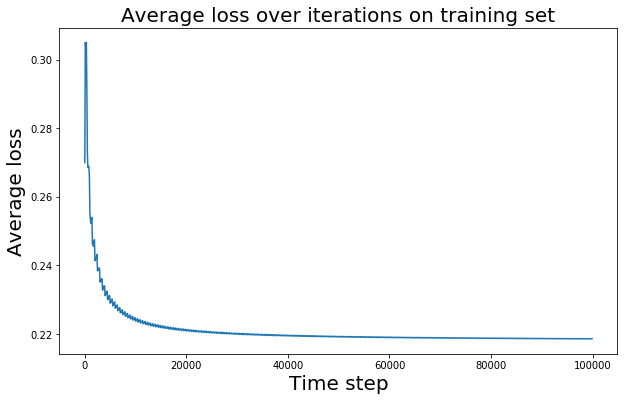

In [44]:
# plot average loss L over the number of steps T
fig = plt.figure(figsize=(10,6))
plt.plot(np.arange(len(logistic_regression.avg_loss_over_itr)) * 100, 
         logistic_regression.avg_loss_over_itr)
plt.title('Average loss over iterations on training set', fontsize=20)
plt.xlabel('Time step', fontsize=20)
plt.ylabel('Average loss', fontsize=20)

### P1.3

(*10 points*) P1.3 Use the model weights to predict whether each patient in the test set has diabetes, for every 100 steps. Plot average of squared errors of your prediction.

<center>$\begin{equation} TestError = \frac{1}{N_{test}}\sum_{i=1}^{N_{test}} (\hat y^i - y^i)^2 \end{equation}$</center>

(268,)

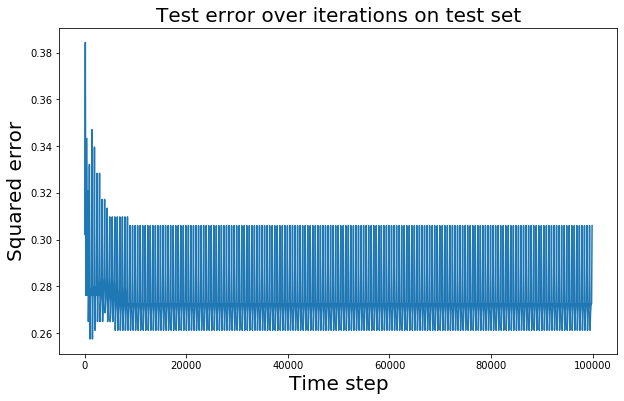

In [45]:
# plot sum of squared error over iterations
plt.figure(figsize=(10,6))
plt.plot(np.arange(len(logistic_regression.test_error_over_itr)) * 100, 
         logistic_regression.test_error_over_itr)
plt.title('Test error over iterations on test set', fontsize=20)
plt.xlabel('Time step', fontsize=20)
plt.ylabel('Squared error', fontsize=20)

y_test.shape

### II. Model evaluation and feature interpretations 


### P2.1   
(*10 points*) P2.1 Using the model after 100,000 iterations, measure test accuracy. Accuracy is the fraction of predictions our model got right. That is, it is computed by Number of correct predictions / Total number of predictions.

In [46]:
accuracy = logistic_regression.get_accuracy(X['test'], y['test'], w)
print(accuracy)

0.6940298507462687


### P2.2

(*5 points*) P2.2 SGD oscillates around a solution (noisy convergence). In order to minimize risk of picking bad weights, we typically use an average model. Measure test accuracy again, using an average model over the weights for the last 1000 iterations


In [47]:
logistic_regression.w_ensemble

array([  4.0301275 ,  12.45431846,  -0.96331388,   0.03278824,
        -1.2966043 ,   7.06309156,   2.48439912,   0.02340241,
       -12.64988036])

In [48]:
accuracy_ensemble = logistic_regression.get_accuracy(
    X['test'], y['test'], logistic_regression.w_ensemble)
print(accuracy_ensemble)

0.7276119402985075


### P2.3


(*5 points*) P2.3 Report the weights of following features, $\texttt{BMI}$, $\texttt{insulin}$, and $\texttt{PGC}$

In [49]:
from P03 import get_indices_of_fields

In [50]:
fields = np.array(['BMI', 'insulin', 'PGC'])
indices = get_indices_of_fields(fields, features)

In [51]:
logistic_regression.w_ensemble[indices]

array([ 7.06309156, -1.2966043 , 12.45431846])


# Result Analysis and Discussion (20 points)



For result analysis and discussion, you can use all functions defined above. Also you can make your own functions or scripts.

Your answer must include the analysis about:

- Difference between Stochastic Gradient Descent and Batch Gradient Descent.
- Influence of each feature in classifying diabetes.
- Effect of applying the ensemble technique.

**Difference between Stochastic Gradient Ascent/Descent and Batch Gradient Ascent/Descent**

Note that Gradient Ascent and Descent are essentially the same except for the direction of convergence, so we would use them interchangebly here. To explain the difference between Stochastic Gradient Ascent (SGA) and Batch Gradient Ascent (BGA), we first state the common weight update equation:

\\({ w }_{ j }^{ (t+1) }={ w }_{ j }^{ (t) }+\eta \frac { \partial ll(w) }{ \partial { w }_{ j } }\\)

**(1)** Using the example of non-regularized Logistic Regression, Batch Gradient Ascent (BGA) has 
\\(\frac { \partial ll(w) }{ \partial { w }_{ j } } = {\sum _{ i=1 }^{ N }}{ h }_{ j }({ x }_{ i })(I[y_{i}=+1] -P(y=+1|{ x }_{ i },{ w }^{ (t) }))\\). To compute the partial gradient of the cost function, we have to sum the gradient contribution of **all N** data samples.
However, Stochastic Gradient Ascent (SGA) has \\(\frac { \partial ll(w) }{ \partial { w }_{ j } } = { h }_{ j }({ x }_{ i })(I[y_{i}=+1] -P(y=+1|{ x }_{ i },{ w }^{ (t) }))\\). To compute the partial gradient, we only need to find the gradient contribution of **one** randomly chosen data sample, \\({ x }_{ i }\\). This works because the gradient contribution of most data samples are directed towards convergence (max for SGA, min for SGD). While it is possible that we pick a data sample whose gradient contribution is opposite from convergence, it is guaranteed that the **net contribution** is towards convergence (on average, make progress). Given enough iterations, SGA/SGD will eventually find its way to the max/min, just like how BGA/BGD does.

**(2)** Because of this, every step of BGA/BGD in non-regualarized Logistic Regression requires a time complexity of O(ND), where N = number of data samples and D = number of features. If we have a very large amount of data sample, say 10 million, it would take a very long time to compute the gradient contribution from every sample just to take one step towards convergence. However, in the case of SGA/SGD, the time complexity is simply O(D), independent of N. This means that SGA/SGD will run much faster per iteration as compared to BGA/BGD.

**(3)** Because SGA/SGD is only using one data sample at every step, its path to the max/min is noiser than that of SGA/SGD. SGA/SGD will eventually oscillate around the optimal weights, hence a need to compute the average weights of the last 1000 iteration as seen in P2.2, just in case we pick a weight relatively 'farther' from the optimal.

**(4)** SGA/SGD requires the training data to be shuffled randomly first. 

**Influence of each feature in classifying diabetes**

The final computed weights for each feature is illustrated in the graph as follows:

num_preg: 4.030127500950709
PGC: 12.454318455647616
DBP: -0.963313879163511
tricept: 0.032788238792955206
insulin: -1.2966043025720317
BMI: 7.0630915564304155
ped_func: 2.4843991210808456
age: 0.0234024065747431


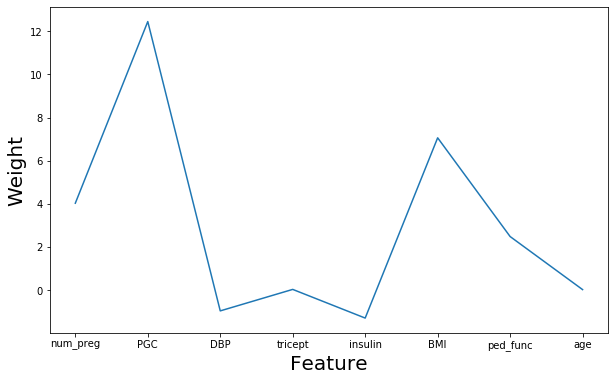

In [52]:
plt.figure(figsize=(10,6))
plt.plot(features, logistic_regression.w_ensemble[0:-1])
plt.xlabel('Feature', fontsize=20)
plt.ylabel('Weight', fontsize=20)
for i in range(len(features)): print(features[i] + ": " + str(logistic_regression.w_ensemble[i])) 

It can be seen that the weights of BMI and PGC are the 2 highest amongst all features. We can thus infer that they are significant features in predicting the likelihood of diabetes in a patient. The higher the values of these features, the higher the score is, and the higher the sigmoid output = probability of positive diabeties is. On the contrary, the small and negative weights of insulin and DBP tell us that they are insignificant in the prediction of diabeties. It may be the case that they reduce the likelihood of diabetes.

**Effect of applying the ensemble technique**

As aforementioned, SGA/SGD will oscillate around the optimal weights; some of the iteration may produce good weights, while others may produce bad weights. There is a possibility that SGA/SGD will end with bad weights. As such, we compute the average weights in the last N iterations, where N is the number of ensemble, and use it as our final weights instead. Before ensemble, the model correctly predicted 69.4% of the test data as denoted by 'accuracy' under P2.1. However, after applying ensemble and using the average weights, the model correctly predicted 72.8% of the test data (under P2.2), an improvement of 3.4%. This shows that it is better to use the average model, as it leads to higher accuracy and hence better prediction.